# Evolution Strategy with Binary Encoding

This notebook implements a (1+1) Evolution Strategy with binary encoding for 1D function optimization.

Key concepts:
- Binary encoding of real-valued parameters
- (1+1) ES: Simple evolutionary algorithm with one parent and one offspring
- Mutation as the only variation operator
- Elitist selection strategy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

In [ ]:
def logical2real(logical_x, a, b):
    """
    Convert binary encoded chromosome to real value in [a,b] range

    Parameters:
    - logical_x: binary encoded chromosome (numpy array of 0s and 1s)
    - a: lower bound of search space
    - b: upper bound of search space

    Returns:
    - Real value in [a,b] corresponding to the binary encoding
    """
    n = len(logical_x)
    int_val = sum(2**i * bit for i, bit in enumerate(logical_x[::-1]))
    return a + (b - a) * int_val / (2**n - 1)


In [ ]:
def BE_initpop(ngenes, popsize=1):
    """
    Initialize a population of binary-encoded individuals

    Parameters:
    - ngenes: number of genes (bits) in each chromosome
    - popsize: population size (default=1)

    Returns:
    - Random binary population (popsize x ngenes array of 0s and 1s)
    """
    return np.random.randint(0, 2, size=(popsize, ngenes)).astype(bool)

In [ ]:
def BE_evaluatefitness(f, P, a, b):
    """
    Evaluate fitness of population by converting binary to real and applying f

    Parameters:
    - f: objective function to minimize
    - P: population matrix (each row is a binary-encoded individual)
    - a: lower bound of search space
    - b: upper bound of search space

    Returns:
    - Array of fitness values for each individual
    """
    fit = np.zeros(P.shape[0])
    for i in range(P.shape[0]):
        fit[i] = f(logical2real(P[i,:], a, b))
    return fit

In [ ]:
def BE_MUT_unif_all(logical_x, mutprob):
    """
    Uniform mutation of potentially all genes in a binary chromosome

    Parameters:
    - logical_x: binary chromosome to mutate
    - mutprob: mutation probability for each gene

    Returns:
    - Mutated chromosome with some bits potentially flipped
    """
    len_x = len(logical_x)
    prob = np.random.rand(len_x)
    ind_of_genes_to_mutate = np.where(prob < mutprob)[0]

    mutated_x = logical_x.copy()
    mutated_x[ind_of_genes_to_mutate] = ~mutated_x[ind_of_genes_to_mutate]
    return mutated_x

In [ ]:
def ES_BE_1D(f, a, b, niter, ngenes, mutprob, dispAndPlot=True):
    """
    (1+1) Evolution Strategy with Binary Encoding for 1D functions

    Parameters:
    - f: objective function to minimize
    - a: lower bound of search space
    - b: upper bound of search space
    - niter: number of iterations
    - ngenes: number of bits in binary encoding
    - mutprob: mutation probability
    - dispAndPlot: whether to display progress and plot (default=True)

    Returns:
    - x_opt: best found solution
    - f_opt: fitness of best solution
    """
    # Initialize random individual
    current_x = BE_initpop(ngenes, 1)[0]

    # Evaluate initial fitness
    current_fitness = BE_evaluatefitness(f, current_x.reshape(1,-1), a, b)[0]

    if dispAndPlot:
        plt.figure(figsize=(8, 6))

        # Prepare colormap for visualization
        colmap = plt.cm.autumn(np.linspace(0, 1, niter))


        # Plot function and initial point
        domain = np.linspace(a, b, 1000)
        plt.plot(domain, f(domain), '-b', label='Objective function')
        plt.plot(logical2real(current_x, a, b), current_fitness, 'sk',
                markersize=8, label='Initial solution')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('(1+1) Evolution Strategy Optimization Progress')
        plt.legend()
        plt.grid(True)

    for i in range(niter):
        # Generate new solution by mutation
        new_x = BE_MUT_unif_all(current_x, mutprob)

        # Evaluate new solution
        new_fitness = BE_evaluatefitness(f, new_x.reshape(1,-1), a, b)[0]

        # Selection: keep better solution
        if new_fitness < current_fitness:
            current_x = new_x
            current_fitness = new_fitness

        if dispAndPlot:
            plt.plot(logical2real(new_x, a, b), new_fitness, 'o',
                    color=colmap[i], alpha=0.6)
            if i % 50 == 0:  # Print progress every 50 iterations
                print(f'Iteration {i+1:4d}: Current best x = {logical2real(current_x, a, b):+.4f}, '
                      f'f(x) = {current_fitness:+.4f}')

    if dispAndPlot:
        # Mark final solution with a red star
        plt.plot(logical2real(current_x, a, b), current_fitness, 'r*',
                markersize=12, label='Final solution')
        plt.legend()
        plt.show()

    x_opt = logical2real(current_x, a, b)
    f_opt = current_fitness

    return x_opt, f_opt

Iteration    1: Current best x = -3.7586, f(x) = +23.5896
Iteration   51: Current best x = +1.8719, f(x) = +6.5701
Iteration  101: Current best x = -0.9238, f(x) = +1.9791
Iteration  151: Current best x = -0.9726, f(x) = +1.0935
Iteration  201: Current best x = -1.0020, f(x) = +1.0047
Iteration  251: Current best x = -1.0020, f(x) = +1.0047
Iteration  301: Current best x = -0.0049, f(x) = +0.0047
Iteration  351: Current best x = -0.0049, f(x) = +0.0047
Iteration  401: Current best x = -0.0049, f(x) = +0.0047
Iteration  451: Current best x = -0.0049, f(x) = +0.0047
Iteration  501: Current best x = -0.0049, f(x) = +0.0047
Iteration  551: Current best x = -0.0049, f(x) = +0.0047
Iteration  601: Current best x = -0.0049, f(x) = +0.0047
Iteration  651: Current best x = -0.0049, f(x) = +0.0047
Iteration  701: Current best x = -0.0049, f(x) = +0.0047
Iteration  751: Current best x = -0.0049, f(x) = +0.0047
Iteration  801: Current best x = -0.0049, f(x) = +0.0047
Iteration  851: Current best x

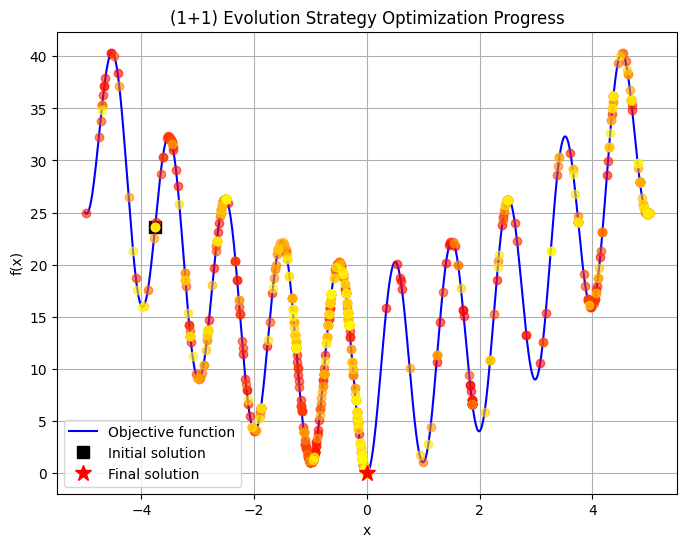


Optimal solution: x = -0.004888, f(x) = 0.004739
Known optimum: x = 0.0, f(x) = 0.0


In [ ]:
# Example 1: Rastrigin Function which has many local minima but a global minimum at x=0.

# Define Rastrigin function
def rastrigin(x):
    return 10 + x**2 - 10*np.cos(2*np.pi*x)

# Run ES
x_opt, f_opt = ES_BE_1D(rastrigin, -5, 5, 1000, 10, 0.2, True)
print(f"\nOptimal solution: x = {x_opt:.6f}, f(x) = {f_opt:.6f}")
print("Known optimum: x = 0.0, f(x) = 0.0")

Iteration    1: Current best x = +6.7478, f(x) = -0.0326
Iteration   51: Current best x = +4.9369, f(x) = -1.6554
Iteration  101: Current best x = +4.9494, f(x) = -1.6824
Iteration  151: Current best x = +4.9494, f(x) = -1.6824
Iteration  201: Current best x = +4.9494, f(x) = -1.6824
Iteration  251: Current best x = +4.9494, f(x) = -1.6824
Iteration  301: Current best x = +4.9494, f(x) = -1.6824
Iteration  351: Current best x = +4.9494, f(x) = -1.6824
Iteration  401: Current best x = +4.9494, f(x) = -1.6824
Iteration  451: Current best x = +4.9494, f(x) = -1.6824
Iteration  501: Current best x = +4.9494, f(x) = -1.6824
Iteration  551: Current best x = +5.1511, f(x) = -1.8994
Iteration  601: Current best x = +5.1511, f(x) = -1.8994
Iteration  651: Current best x = +5.1511, f(x) = -1.8994
Iteration  701: Current best x = +5.1511, f(x) = -1.8994
Iteration  751: Current best x = +5.1511, f(x) = -1.8994
Iteration  801: Current best x = +5.1511, f(x) = -1.8994
Iteration  851: Current best x 

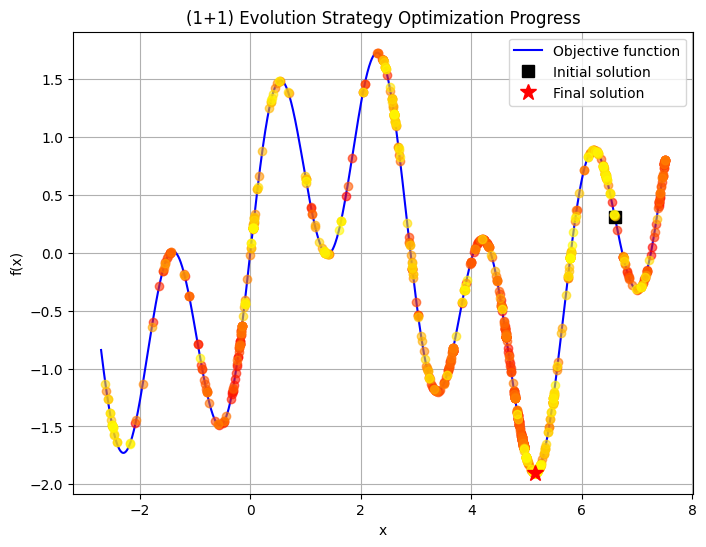


Optimal solution: x = 5.151136, f(x) = -1.899425
Known optimum: x ≈ 5.145735, f(x) ≈ -1.8996


In [ ]:
# Example 2: Sinusoidal Function this function has multiple local minima with a global minimum at x ≈ 5.145735.

def sinusoidal(x):
    return np.sin(x) + np.sin(10/3 * x)

x_opt, f_opt = ES_BE_1D(sinusoidal, -2.7, 7.5, 1000, 12, 0.2, True)
print(f"\nOptimal solution: x = {x_opt:.6f}, f(x) = {f_opt:.6f}")
print("Known optimum: x ≈ 5.145735, f(x) ≈ -1.8996")